In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
digits = pd.read_csv ("../datasets/train.csv")
test = pd.read_csv ("../datasets/test.csv")

## First step is to convert the data into arrays

In [2]:
#Separate out the outcome variable
labels=digits.label
#Drop the label column to enable conversion of 784 column dataset into 28 x 28 array
digits_1=digits.drop(['label'], axis=1)
digits_2=np.array(digits_1)
#Test dataset is already 784 columns
test_1=np.array(test)

## Train the KNN classifier with the training dataset (X=digits_2, y=labels)

In [3]:
from sklearn import neighbors, metrics
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(digits_2,labels)
print (knn.predict(digits_2))
print (knn.score(digits_2, labels))

[1 0 1 ..., 7 6 9]
1.0


## Run the model on the test dataset

In [5]:
predictions=knn.predict(test_1)

In [6]:
print (knn.predict(test_1))

[2 0 9 ..., 3 9 2]


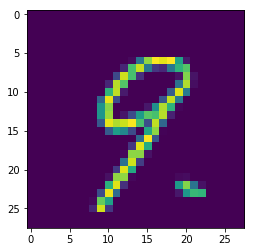

In [15]:
plt.imshow(test_1[2].reshape((28, 28)))

In [42]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()

## The Results

In [30]:
from IPython.display import Image
Image('img/../images/Screenshot_Submission_Score.png')

![Kaggle Accuracy Score](img/images/Screenshot_Submission_Score.png)

<img src='../Screenshot_Submission_Score.png' height= 75% width= 75%>

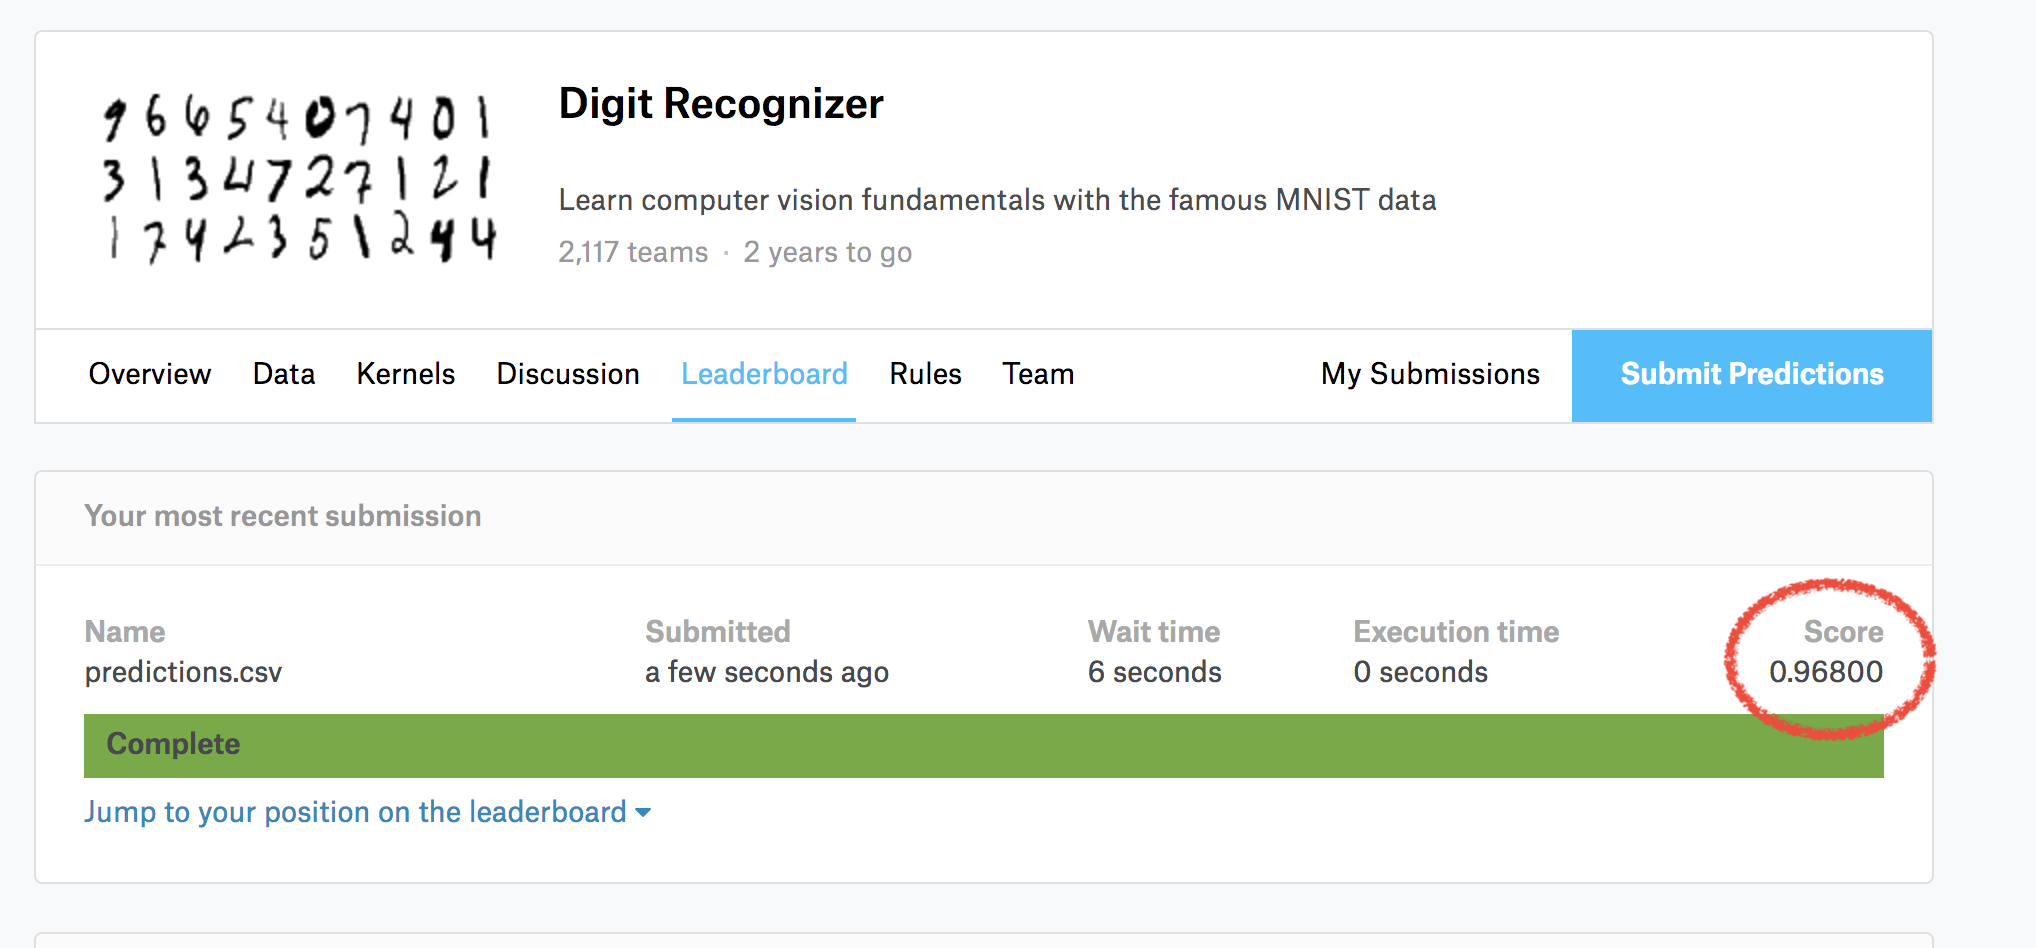

In [31]:
from IPython.display import Image
Image(filename='Screenshot_Submission_Score.png') 